In [ ]:
##Imporing required libraries

In [414]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [417]:
def load_dataset(dataset):
    df = pd.read_csv(dataset)
    X = df.drop('target', axis=1)
    y = df.get('target')
    X = (X-X.mean())/X.std()
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.7)
    print(y_train.shape)
    X_train = X_train.T
    y_train = y_train.values.reshape(1,y_train.values.shape[0])
    print(y_train.shape)
    X_test = X_test.T
    ##y_test = y_test.values.reshape(1,y_test.values.shape[0])
    
    return X_train,y_train,X_test,y_test

In [418]:
X_train,y_train,X_test,y_test = load_dataset("heart.csv")

(212,)
(1, 212)


In [422]:
y_train

array([[1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0]], dtype=int64)

In [388]:
y_test[225]

-1.0916529334612046

In [389]:
X_test[225]

age         1.721371
sex         0.679881
cp         -0.936965
trestbps    0.762694
chol       -1.394231
fbs        -0.416945
restecg     0.897478
thalach    -1.076040
exang       1.433110
oldpeak     1.343924
slope      -2.270822
ca         -0.713249
thal        1.121174
Name: 225, dtype: float64

In [476]:
def initialize_parameters(layer_dims):
    np.random.seed(2)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
    return parameters

In [460]:
parameters = initialize_parameters([X_train.shape[0],200,60,1])

In [461]:
parameters["W3"].shape

(1, 60)

In [462]:
def forward_propagation(X,parameters):
    linear = {}
    activations = {}
    activations["A0"] = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = activations["A"+str(l-1)]
        linear["Z"+str(l)] = np.dot(parameters["W"+str(l)],A_prev)+parameters["b"+str(l)]
        activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
    A_prev = activations["A"+str(L-1)]
    linear["Z"+str(L)] = np.dot(parameters["W"+str(L)],A_prev)+parameters["b"+str(L)]
    activations["A"+str(L)] = 1/(1+np.exp(-linear["Z"+str(L)]))
    return linear,activations

In [463]:
linear,activations = forward_propagation(X_test[225].values.reshape(13,1),parameters)

In [464]:
A2.shape

(60, 1)

In [465]:
X_test.shape

(13, 91)

In [466]:
activations["A3"]

array([[0.97801549]])

In [467]:
def compute_cost(AL,Y):
    
    m = Y.shape[1]
    cost = -np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))/m
    
    return cost

In [468]:
def backward_propagation(AL, Y, linear,activations,parameters):
    grads = {}
    L = len(linear)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    grads["dZ"+str(L)] = AL-Y
    grads["dW" + str(L)] = 1./m * np.dot(grads["dZ"+str(L)],activations["A"+str(L)].T)
    grads["db" + str(L)] = 1./m * np.sum(grads["dZ"+str(L)],axis=1, keepdims=True)
    for l in reversed(range(L-1)):
        s = 1/(1+np.exp(-linear["Z"+str(l+1)]))
        grads["dZ"+str(l+1)] = np.dot(parameters['W'+str(l+2)].T,grads["dZ"+str(l+2)])*s*(1-s)
        grads["dW" + str(l + 1)] = 1./m * np.dot(grads["dZ"+str(l+1)],activations["A"+str(l)].T)
        grads["db" + str(l + 1)] = 1./m * np.sum(grads["dZ"+str(l+1)],axis=1, keepdims=True)
    return grads

In [469]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db" + str(l+1)]
        
    return parameters

In [470]:
parameters = initialize_parameters([X_train.shape[0],50,100,1])
linear,activations = forward_propagation(X_train,parameters)
L = len(parameters) // 2
grads = backward_propagation(activations["A"+str(L)],y_train,linear,activations,parameters)
parameters = update_parameters(parameters,grads,0.001)

In [471]:
grads["db3"].shape

(1, 1)

In [477]:
def optimize(X, Y, layers_dims, learning_rate, num_iterations = 2500, print_cost=False):

    np.random.seed(1)
    costs = []
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):
        
        linear,activations = forward_propagation(X_train,parameters)
        L = len(parameters) // 2
        grads = backward_propagation(activations["A"+str(L)],y_train,linear,activations,parameters)
        cost = compute_cost(activations["A"+str(L)],Y)
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    print ("Cost after iteration %i: %f" %(i, cost))
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters,costs

In [473]:
y_train.shape[1]

212

Cost after iteration 0: 1.268901
Cost after iteration 1000: 0.149475
Cost after iteration 2000: 0.127489
Cost after iteration 3000: 0.119156
Cost after iteration 4000: 0.106826
Cost after iteration 5000: 0.100349
Cost after iteration 6000: 0.083548
Cost after iteration 7000: 0.070014
Cost after iteration 8000: 0.062141
Cost after iteration 9000: 0.056047
Cost after iteration 10000: 0.051052
Cost after iteration 11000: 0.044068
Cost after iteration 12000: 0.040495
Cost after iteration 13000: 0.039677
Cost after iteration 14000: 0.033565
Cost after iteration 14999: 0.023620


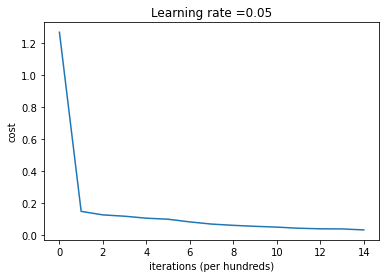

In [481]:
parameters,costs = optimize(X_train, y_train, [X_train.shape[0],100,100,1], learning_rate = 0.05, num_iterations = 15000, print_cost=True)

In [443]:
parameters["W3"].shape

(1, 100)

In [444]:
linear,activations = forward_propagation(X_test[225].values.reshape(13,1),parameters)
activations["A3"].shape

(1, 1)

Cost after iteration 0: 0.674248
Cost after iteration 1000: 0.346113
Cost after iteration 2000: 0.296984
Cost after iteration 3000: 0.257502
Cost after iteration 4000: 0.225617
Cost after iteration 5000: 0.203529
Cost after iteration 6000: 0.180784
Cost after iteration 7000: 0.156233
Cost after iteration 8000: 0.132368
Cost after iteration 9000: 0.113222
Cost after iteration 10000: 0.098092
Cost after iteration 11000: 0.087218
Cost after iteration 12000: 0.078331
Cost after iteration 13000: 0.070436
Cost after iteration 14000: 0.063084
Cost after iteration 14999: 0.056585


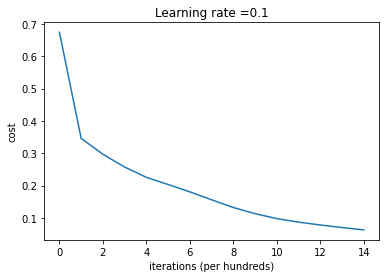

Cost after iteration 0: 1.162566
Cost after iteration 1000: 0.327602
Cost after iteration 2000: 0.283286
Cost after iteration 3000: 0.253895
Cost after iteration 4000: 0.219041
Cost after iteration 5000: 0.173009
Cost after iteration 6000: 0.135978
Cost after iteration 7000: 0.102933
Cost after iteration 8000: 0.075431
Cost after iteration 9000: 0.052878
Cost after iteration 10000: 0.038306
Cost after iteration 11000: 0.025124
Cost after iteration 12000: 0.016761
Cost after iteration 13000: 0.012423
Cost after iteration 14000: 0.009789
Cost after iteration 14999: 0.008058


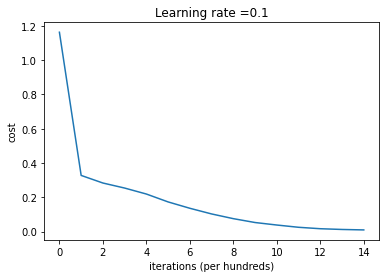

Cost after iteration 0: 0.909183
Cost after iteration 1000: 0.361006
Cost after iteration 2000: 0.286460
Cost after iteration 3000: 0.220204
Cost after iteration 4000: 0.163142
Cost after iteration 5000: 0.106590
Cost after iteration 6000: 0.064717
Cost after iteration 7000: 0.042781
Cost after iteration 8000: 0.027978
Cost after iteration 9000: 0.018353
Cost after iteration 10000: 0.011648
Cost after iteration 11000: 0.007947
Cost after iteration 12000: 0.005941
Cost after iteration 13000: 0.004635
Cost after iteration 14000: 0.003724
Cost after iteration 14999: 0.003092


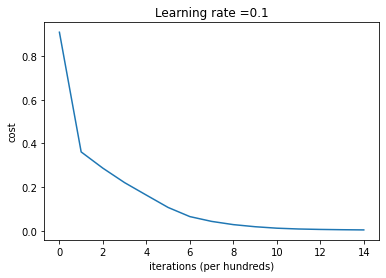

Cost after iteration 0: 2.997821
Cost after iteration 1000: 0.176344
Cost after iteration 2000: 0.132876
Cost after iteration 3000: 0.114328
Cost after iteration 4000: 0.090144
Cost after iteration 5000: 0.057959
Cost after iteration 6000: 0.029272
Cost after iteration 7000: 0.022921
Cost after iteration 8000: 0.016932
Cost after iteration 9000: 0.012225
Cost after iteration 10000: 0.009677
Cost after iteration 11000: 0.008591
Cost after iteration 12000: 0.007136
Cost after iteration 13000: 0.005890
Cost after iteration 14000: 0.005308
Cost after iteration 14999: 0.004950


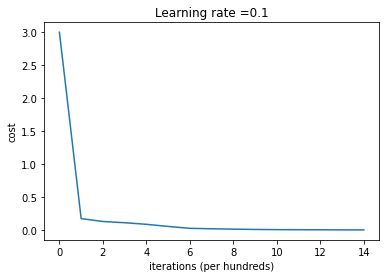

Cost after iteration 0: 1.268901
Cost after iteration 1000: 0.127595
Cost after iteration 2000: 0.106794
Cost after iteration 3000: 0.083811
Cost after iteration 4000: 0.062599
Cost after iteration 5000: 0.050200
Cost after iteration 6000: 0.039423
Cost after iteration 7000: 0.033583
Cost after iteration 8000: 0.018590
Cost after iteration 9000: 0.013768
Cost after iteration 10000: 0.011390
Cost after iteration 11000: 0.008389
Cost after iteration 12000: 0.006669
Cost after iteration 13000: 0.005215
Cost after iteration 14000: 0.004129
Cost after iteration 14999: 0.003374


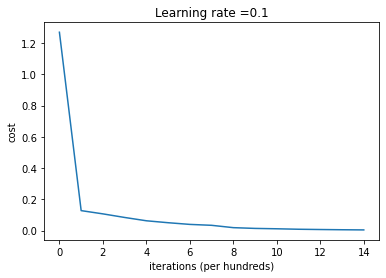

Cost after iteration 0: 4.128922
Cost after iteration 1000: 0.079857
Cost after iteration 2000: 0.071442
Cost after iteration 3000: 0.056725
Cost after iteration 4000: 0.053720
Cost after iteration 5000: 0.038421
Cost after iteration 6000: 0.037588
Cost after iteration 7000: 0.025543
Cost after iteration 8000: 0.021428
Cost after iteration 9000: 0.022716
Cost after iteration 10000: 0.019053
Cost after iteration 11000: 0.014850
Cost after iteration 12000: 0.014667
Cost after iteration 13000: 0.012778
Cost after iteration 14000: 0.011549
Cost after iteration 14999: 0.010882


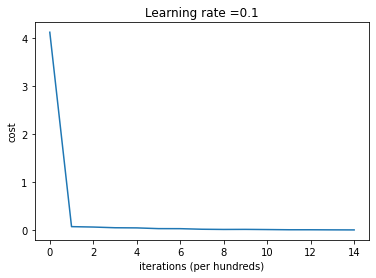

Cost after iteration 0: 4.399307
Cost after iteration 1000: 0.082898
Cost after iteration 2000: 0.059790
Cost after iteration 3000: 0.042078
Cost after iteration 4000: 0.032984
Cost after iteration 5000: 0.027143
Cost after iteration 6000: 0.026889
Cost after iteration 7000: 0.027269
Cost after iteration 8000: 0.022963
Cost after iteration 9000: 0.015666
Cost after iteration 10000: 0.013109
Cost after iteration 11000: 0.010337
Cost after iteration 12000: 0.008522
Cost after iteration 13000: 0.007309
Cost after iteration 14000: 0.008307
Cost after iteration 14999: 0.007643


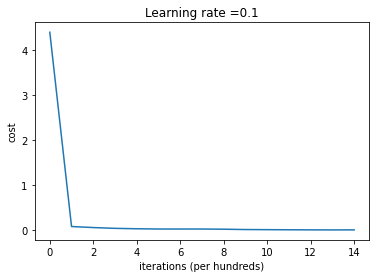

Cost after iteration 0: 2.808413
Cost after iteration 1000: 0.063440
Cost after iteration 2000: 0.044840
Cost after iteration 3000: 0.040395
Cost after iteration 4000: 0.041702
Cost after iteration 5000: 0.030586
Cost after iteration 6000: 0.026955
Cost after iteration 7000: 0.021878
Cost after iteration 8000: 0.016999
Cost after iteration 9000: 0.014820
Cost after iteration 10000: 0.012538
Cost after iteration 11000: 0.013579
Cost after iteration 12000: 0.012995
Cost after iteration 13000: 0.011792
Cost after iteration 14000: 0.010616
Cost after iteration 14999: 0.009161


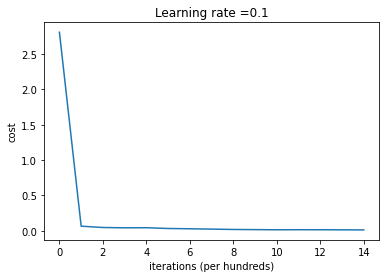

In [482]:
diff_hidden_layers_size = [[X_train.shape[0],5,5,1],[X_train.shape[0],10,10,1],
                           [X_train.shape[0],20,20,1],[X_train.shape[0],50,50,1],
                           [X_train.shape[0],100,100,1],[X_train.shape[0],150,150,1],
                           [X_train.shape[0],200,200,1],[X_train.shape[0],250,250,1]]

diff_hidden_layers_parameters = {}
diff_hidden_layers_costs = {}
count = 1

for hidden_layer in diff_hidden_layers_size:
    parameters,cost = optimize(X_train, y_train, hidden_layer, learning_rate = 0.1, num_iterations = 15000, print_cost=True)
    diff_hidden_layers_parameters["NN"+str(count)] = parameters
    diff_hidden_layers_costs["NN"+str(count)] = cost
    count += 1

In [487]:
def model_predict(x,parameters):
    activations["A0"] = x
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = activations["A"+str(l-1)]
        linear["Z"+str(l)] = np.dot(parameters["W"+str(l)],A_prev)+parameters["b"+str(l)]
        activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
    linear["Z"+str(L)] = np.dot(parameters["W"+str(L)],activations["A"+str(l)])+parameters["b"+str(L)]
    print(linear["Z"+str(L)].shape)
    y = 1/(1+np.exp(-linear["Z"+str(L)]))
    return y

In [488]:
def predict(x,parameters):
    y = model_predict(x,parameters)
    y[y>=0.5] = 1
    y[y<0.5] = 0
    return y.astype(int)

In [489]:
predict(X_test,parameters)

(1, 91)


array([[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 1, 0]])

In [490]:
y_test.values.reshape(1,91)

array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0]], dtype=int64)

In [413]:
y_test

225   -1.091653
152    0.913019
228   -1.091653
201   -1.091653
52     0.913019
         ...   
253   -1.091653
293   -1.091653
76     0.913019
272   -1.091653
238   -1.091653
Name: target, Length: 91, dtype: float64

In [375]:
predictions = predict(X_test,parameters)
predictions = predictions.astype(int)
predictions

(1, 91)


array([[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 1]])

In [383]:
accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1))

ValueError: `axis` must be fewer than the number of dimensions (1)

In [94]:
x.shape

(13, 1)